# Classification on Iris Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Loading Datasets

In [2]:
df0 = datasets.load_iris()

In [3]:
df = pd.DataFrame( df0.data, columns=df0.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['Species'] = df0.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
print("Here in the Species ", df.Species.unique()," stands for ",df0.target_names)

Here in the Species  [0 1 2]  stands for  ['setosa' 'versicolor' 'virginica']


Which are the respective target classes.

# EDA

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Inference:**  
**The data is clean.** There are no missing values.

In [8]:
df.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

**Inference:**  
 For each class there are 50 observations. **The data is balanced.**

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Inference:**
- The count shows that we have 150 observations.
- The mean of Species is to be ignored as it is label-encoded.
- From mean and max we see that there are neither negative values nor zeroes, which would signify incorrect data - as features are measurement of length.
- The standard deviation and quartiles are also given for the data, again Species is to be excluded(label-encoded).

## Density of features

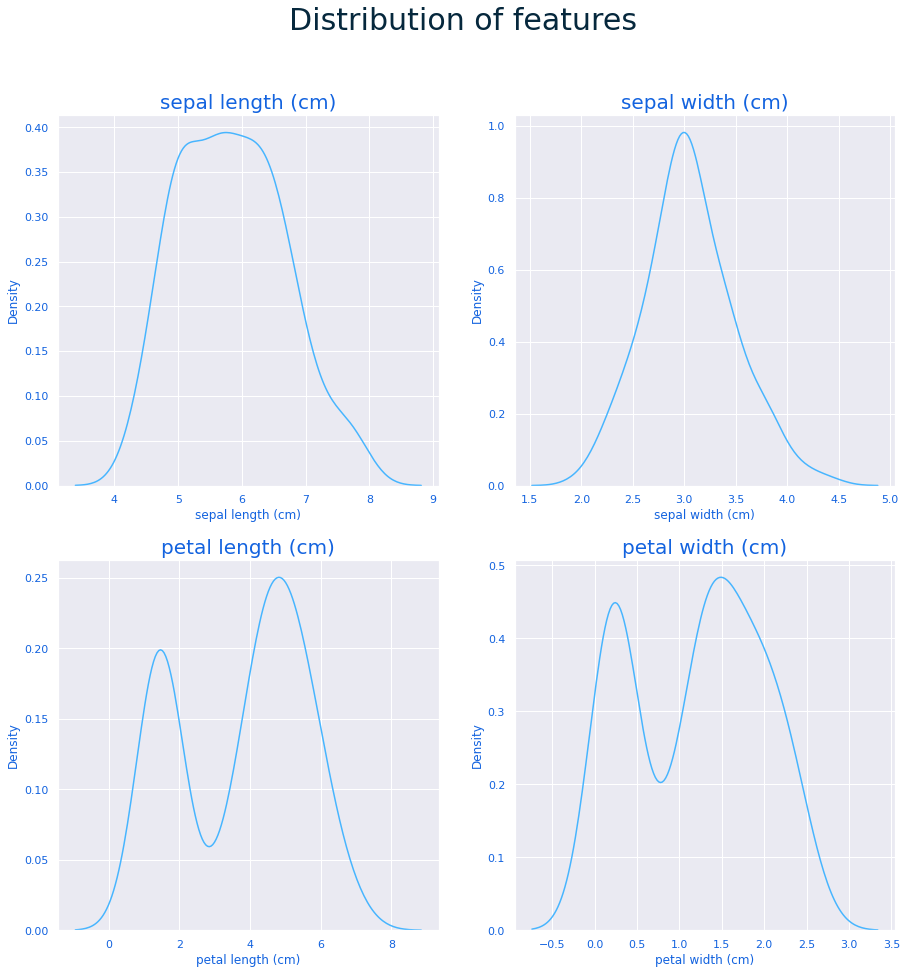

In [10]:
plt.figure(figsize=(15,15))
i=1
sns.set(rc={'ytick.labelcolor':'#1363DF','xtick.labelcolor':'#1363DF','axes.labelcolor':'#1363DF'}) 
for feature in df.columns.drop('Species'):
    plt.subplot(2,2,i)
    i +=1
    sns.kdeplot(df[feature], color='#47B5FF')
    plt.title(feature, size=20, color='#1363DF')
plt.suptitle("Distribution of features", fontsize=30, color='#06283D')
plt.show()

**Inference:**
- Sepal length appears to be flat topped bell shaped, which means standard deviation is pretty large.
- sepal width appears to have somewhat normal distribution and has less variance.
- petal-length is bimodal curve with considerable amplitude(difference between major mode and minor mode)
- petal-width is also bi-modal.  
**The bimodal curves could be caused due to different distributions of classes within them. We investigate this next.**

## Distribution of features per class

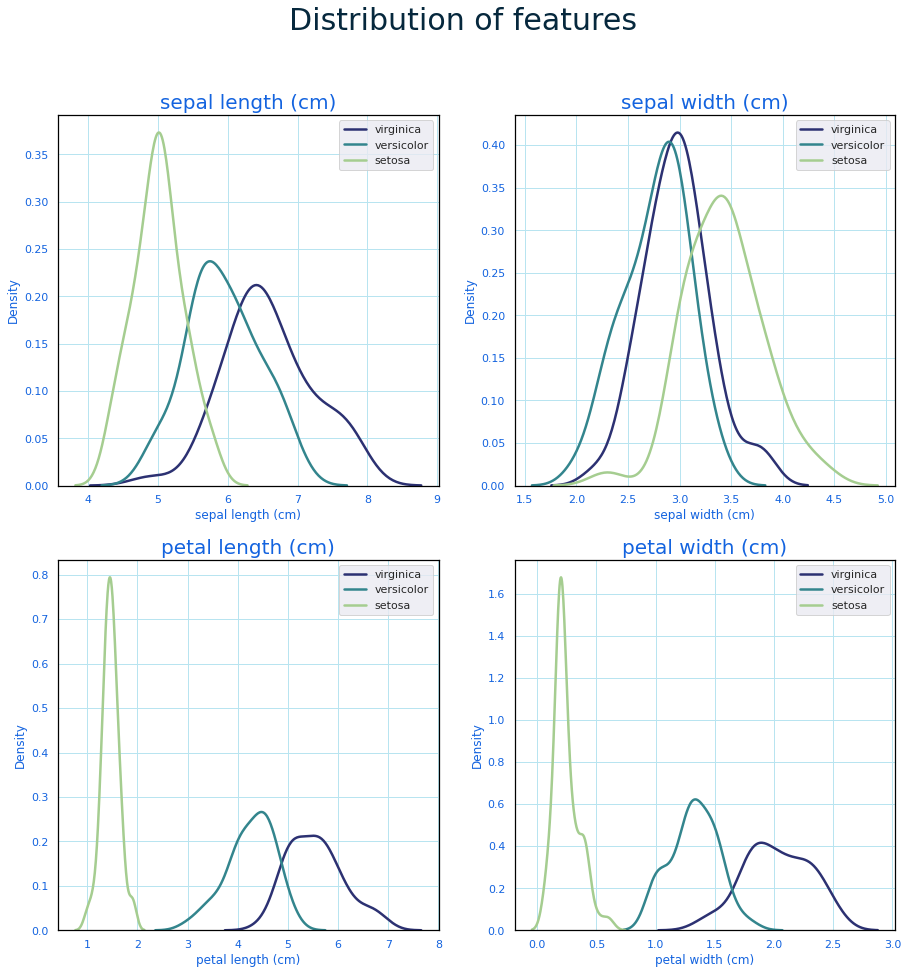

In [11]:
plt.figure(figsize=(15,15))
i=1
sns.set(rc={'ytick.labelcolor':'#1363DF','xtick.labelcolor':'#1363DF','axes.labelcolor':'#1363DF', 'axes.edgecolor':'black'}) 
for feature in df.columns.drop('Species'):
    ax = plt.subplot(2,2,i)
    ax.set_facecolor('white') #removing the default background
    ax.set_axisbelow(True) #setting grids z axis below plots
    ax.xaxis.grid(color='#B8E4F0', linestyle='solid')
    ax.yaxis.grid(color='#B8E4F0', linestyle='solid')
    i +=1
    sns.kdeplot(data = df, x=feature,hue='Species', palette='crest', linewidth=2.5)
    plt.title(feature, size=20, color='#1363DF')
    plt.legend(labels=[df0.target_names[2],df0.target_names[1],df0.target_names[0]])
plt.suptitle("Distribution of features", fontsize=30, color='#06283D')
plt.show()

**Inference:**
- **It is clear that the bimodal nature was due to difference in distribution of data for each class.**
- There is significant differene in distribution of features for each class.
- Here we can clearly see the cause of bi-modal for petal-length and petal-width, as setosa data is very different from other two.
- The distribution for versicolor and virginica are more alike to each other than virginica.
- None of the features are normally distributed in classwise distribution also.

## Pairplot

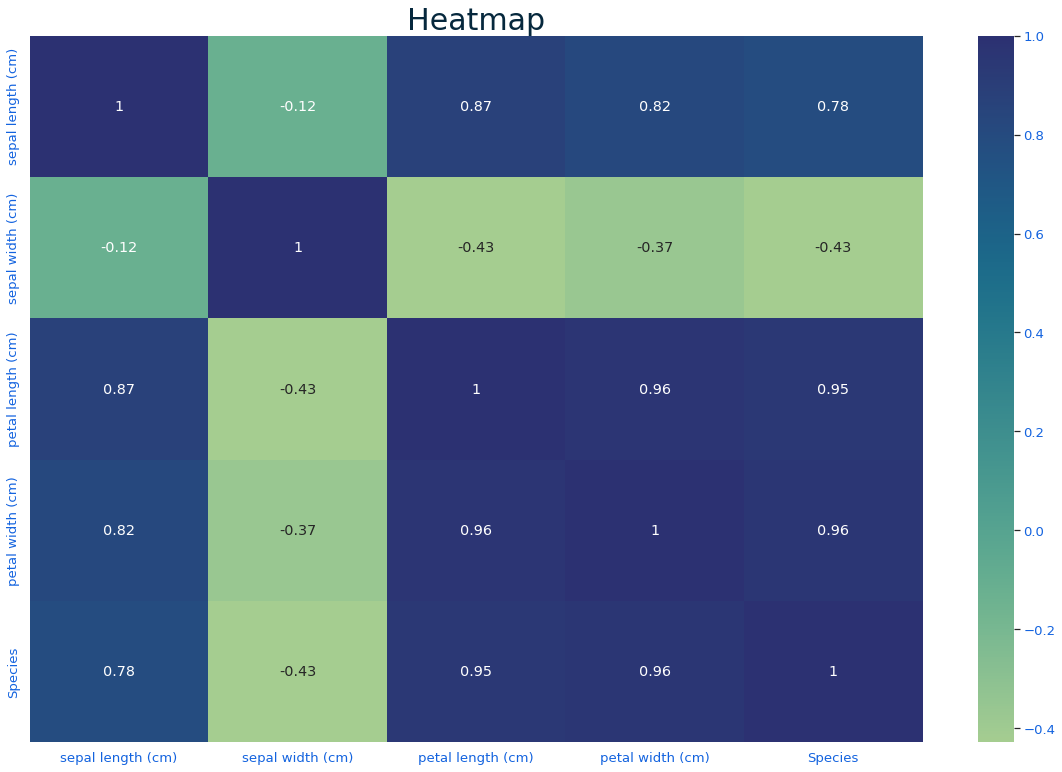

In [12]:
corr = df.corr()
plt.figure(figsize=(20,13))
sns.set(font_scale=1.2)
sns.heatmap(data=corr, annot=True, cmap="crest")
plt.title("Heatmap", fontsize=30, color='#06283D')
plt.show()

**Inference:**
- Target variable Species(which is label-encoded) shows stron positive-correlation with petal-length and petal-width.
- There is very strong positive-correlation between petal-length and petal-width.
- Sepal-length also has strong positive-correlation with petal-width and petal-length.

## Pairplot

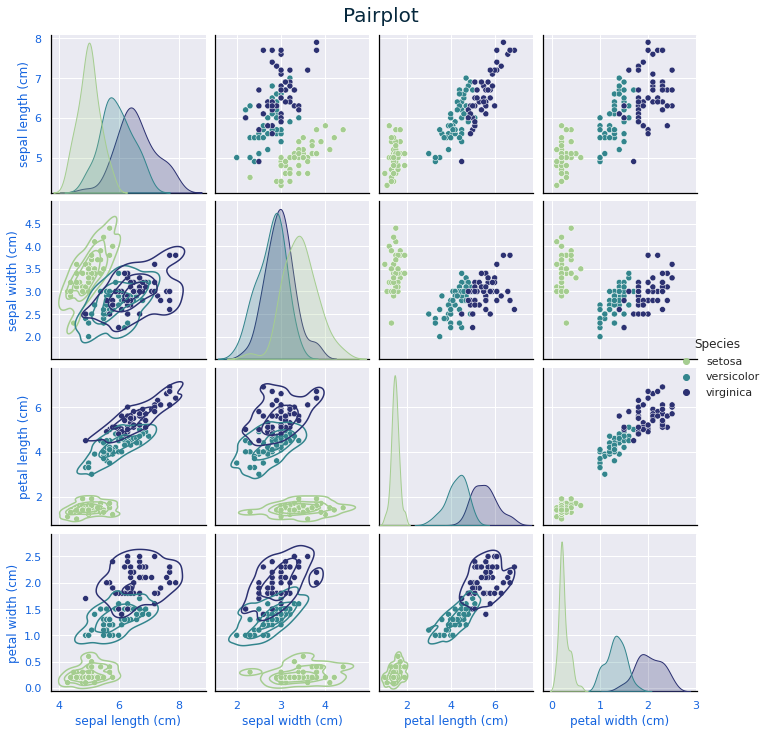

In [13]:
sns.set(rc={'ytick.labelcolor':'#1363DF','xtick.labelcolor':'#1363DF','axes.labelcolor':'#1363DF', 'axes.edgecolor':'black'}) 
g = sns.pairplot(df, diag_kind="kde", palette='crest', hue='Species')
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.fig.suptitle("Pairplot", size=20, color='#06283D', y=1.02)
for t, l in zip(g._legend.texts, df0.target_names):
    t.set_text(l)
plt.show()

**Inference:**
- The data of setosa is very different from other two.
- Note that the data of versicolor and virginica tends to be closer together.
- In almost all bivariate distributions the data has formed almost 3 distinct clusters.
- The scatter-plot of petal-length and petal-width, petal-length and petal-length confirms their positive correlation.

## Inferences from EDA

- Setosa forms distinct distributino from other two and thus is linearly separable.
- versicolor and virginica is also not so overlapped for some feature combinations.
- petal-length and petal-width are highly positively correlated.
- sepal-length and petal-length are also positively correlated.

# Feature Scaling

In [14]:
# backup=df.copy()

In [15]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [16]:
from sklearn.preprocessing import StandardScaler

def scaleFun(df, col):
    scaler = StandardScaler()
    scaler.fit(df[[col]])
    df[col] = scaler.transform(df[[col]])

We do standard scaling for every feature.

In [17]:
for col in df.columns.drop('Species'):
    scaleFun(df,col)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
5,-0.537178,1.939791,-1.169714,-1.052180,0
6,-1.506521,0.788808,-1.340227,-1.183812,0
7,-1.021849,0.788808,-1.283389,-1.315444,0
8,-1.748856,-0.362176,-1.340227,-1.315444,0
9,-1.143017,0.098217,-1.283389,-1.447076,0


## Renaming columns
Now that the features are scaled we should remove '(cm)' from their names.

In [18]:
df.columns = df.columns.str.replace(' \\(cm\\)','', regex=True)

# Modelling

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df.Species, test_size=0.2, random_state=13)
print("x train shape = ", x_train.shape)
print("y train shape = ", y_train.shape)
print("x test shape = ", x_test.shape)
print("Y test shape = ", y_test.shape)

x train shape =  (120, 4)
y train shape =  (120,)
x test shape =  (30, 4)
Y test shape =  (30,)


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

### Creating the model

In [22]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

### Predicting

In [23]:
y_pred = LR.predict(x_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

### Performance Measurement

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score
def printScores(model, y_test, y_pred):
    print("Score on test data:","%.4f" % (model.score(x_test,y_test)*100),"%")
    print("Precision score:", "%.4f" % (precision_score(y_test, y_pred, average='macro')*100),"%")
    print("Recall score:", "%.4f" % (recall_score(y_test, y_pred, average='macro')*100),"%")
    print("F1 score:", "%.4f" % (f1_score(y_test, y_pred, average='macro')*100),"%")

In [25]:
printScores(LR, y_test, y_pred)

Score on test data: 96.6667 %
Precision score: 96.2963 %
Recall score: 97.4359 %
F1 score: 96.7059 %


### Confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printCM(model, target_names, x_test, y_test):
    labels = target_names
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,10))
    hm = sns.heatmap(cm, fmt=".3f", annot=True, cmap="crest", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", size=30, color='#06283D')
    plt.xlabel("Predicted",  size=20, color='#1363DF')
    plt.ylabel("Actual",  size=20, color='#1363DF')
    plt.show()

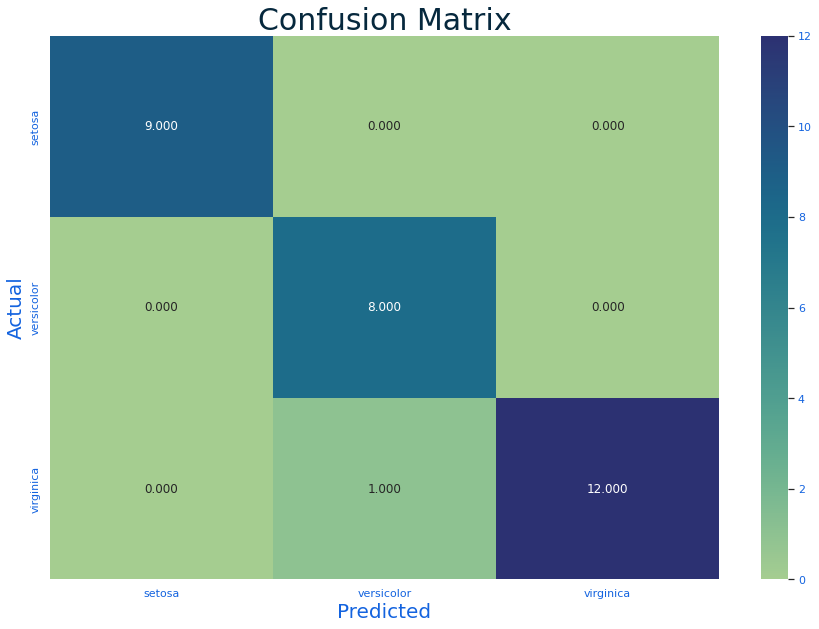

In [27]:
printCM(LR, df0.target_names, x_test, y_test)

**Inference:**
- One virginica datapoint was misclassified as versicolor.

### Decision Boundary for all combinations of features

In [29]:
! pip install mlxtend --quiet

In [30]:
from mlxtend.plotting import plot_decision_regions

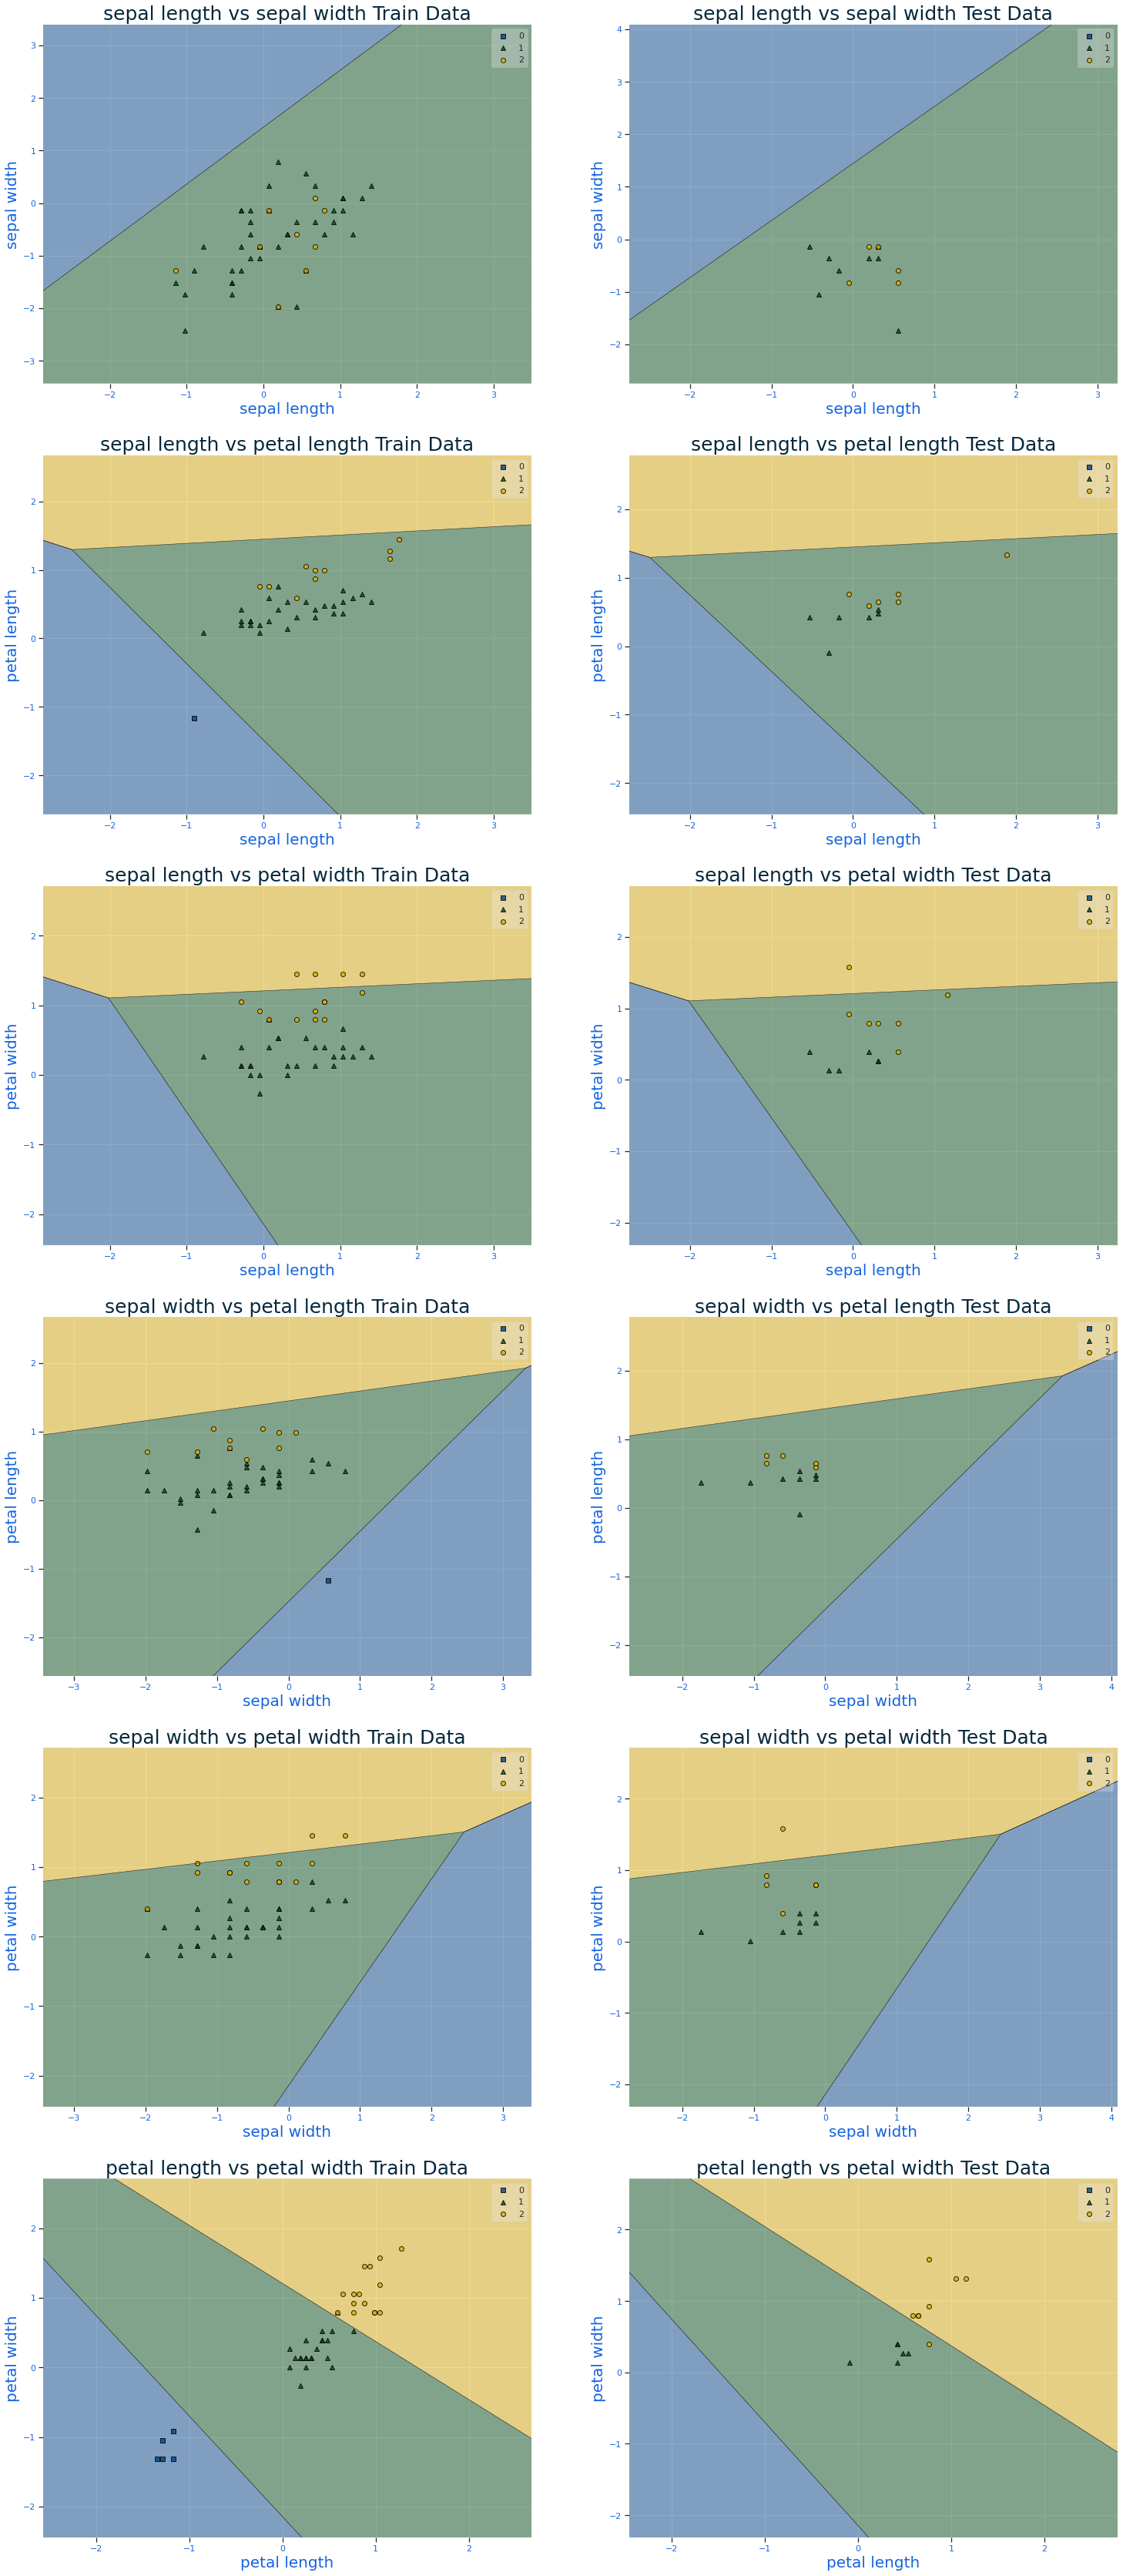

In [31]:
# Supressing warnings; Caused by the bug in sklearn
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

#trying all combinations of features
from itertools import combinations
count=1 #plot count
plt.figure(figsize=(25,60))
for pair in list(combinations([0,1,2,3],2)): #for all possible pairs of features
    comp = tuple(set((0,1,2,3)).difference(set(pair)))
    f1,f2 = pair[0],pair[1] #features for whom decision boundary is made
    f3,f4 = comp[0],comp[1] #features for whom it is not made
    plt.subplot(6,2,count)
    count +=1
    plot_decision_regions(X=x_train.values, y=y_train.values, clf=LR,\
                          feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                          colors='#004485,#044d0f,#dfb000')
    plt.title(df.columns[f1] +" vs "+ df.columns[f2] + " Train Data", size=25, color='#06283D')
    plt.xlabel(df.columns[f1],  size=20, color='#1363DF')
    plt.ylabel(df.columns[f2],  size=20, color='#1363DF')

    plt.subplot(6,2,count)
    count +=1
    plot_decision_regions(X=x_test.values, y=y_test.values, clf=LR,\
                          feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                          colors='#004485,#044d0f,#dfb000')
    plt.title(df.columns[f1] +" vs "+ df.columns[f2] + " Test Data", size=25, color='#06283D')
    plt.xlabel(df.columns[f1],  size=20, color='#1363DF')
    plt.ylabel(df.columns[f2],  size=20, color='#1363DF')

plt.show()

**Inference:**
- For most of the pairs the decision boundary isnt proper.
- **We take petal-width and petal-length because the class-clusters are clearly distinct in it.**


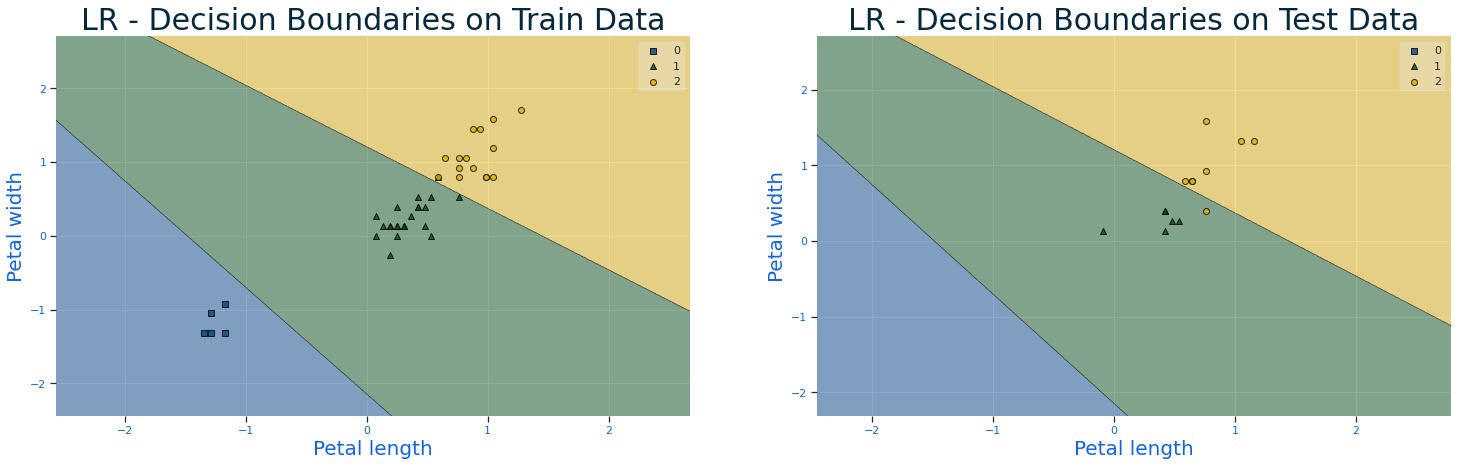

In [32]:
plt.figure(figsize=(25,7))
f1,f2 = 2,3
f3,f4 = 0,1
plt.subplot(1,2,1)
plot_decision_regions(X=x_train.values, y=y_train.values, clf=LR,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("LR - Decision Boundaries on Train Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.subplot(1,2,2)
plot_decision_regions(X=x_test.values, y=y_test.values, clf=LR,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("LR - Decision Boundaries on Test Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.show()

## Naive Bayes

### Creating the model

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

### Predicting

In [35]:
y_pred = GNB.predict(x_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

### Performance Measurement

In [36]:
printScores(GNB, y_test, y_pred)

Score on test data: 96.6667 %
Precision score: 96.2963 %
Recall score: 97.4359 %
F1 score: 96.7059 %


### Confusion Matrix

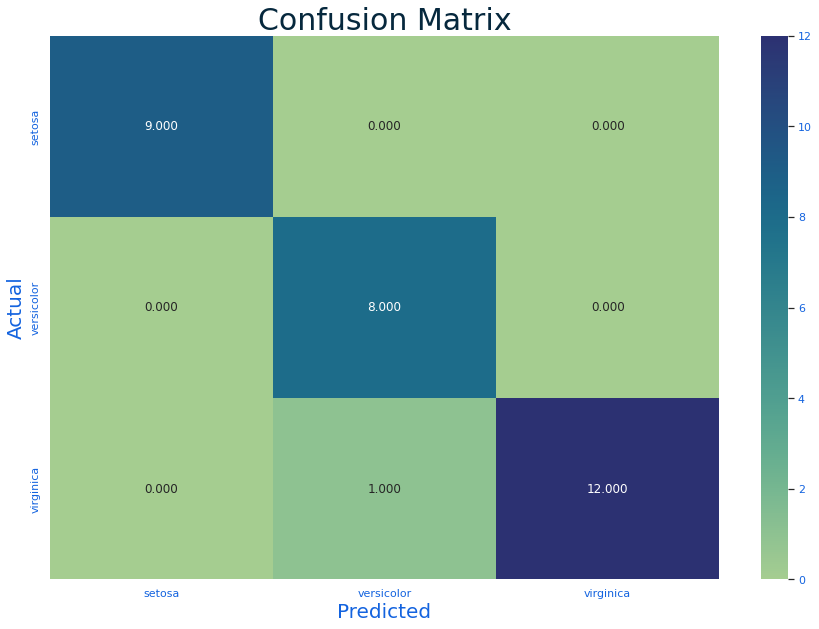

In [37]:
printCM(GNB, target_names=df0.target_names, x_test=x_test, y_test=y_test)

**Inference:**
- One virginica datapoint was misclassified as versicolor.

### Decision Boundaries

We take petal-width and petal-length because the class-clusters are clearly distinct in it.

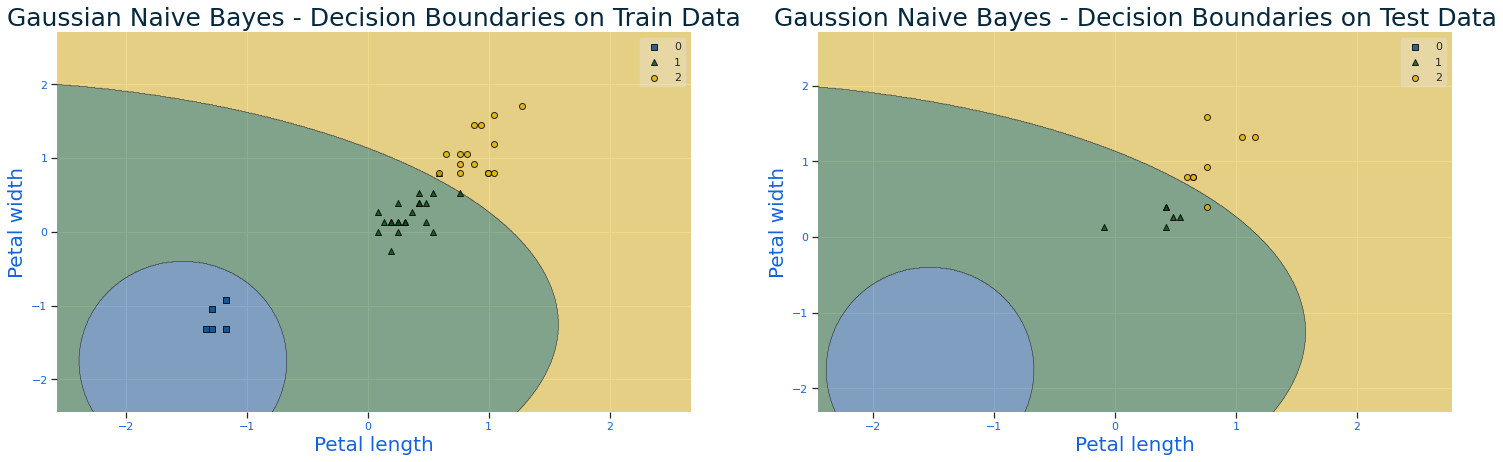

In [38]:
plt.figure(figsize=(25,7))
f1,f2 = 2,3
f3,f4 = 0,1
plt.subplot(1,2,1)
plot_decision_regions(X=x_train.values, y=y_train.values, clf=GNB,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("Gaussian Naive Bayes - Decision Boundaries on Train Data", size=25, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.subplot(1,2,2)
plot_decision_regions(X=x_test.values, y=y_test.values, clf=GNB,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("Gaussion Naive Bayes - Decision Boundaries on Test Data", size=25, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.show()

## KNN

### Creating the model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNN = KNeighborsClassifier(7)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Predicting

In [41]:
y_pred = KNN.predict(x_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

### Performance Measurement

In [42]:
printScores(KNN, y_test, y_pred)

Score on test data: 96.6667 %
Precision score: 96.2963 %
Recall score: 97.4359 %
F1 score: 96.7059 %


### Confusion Matrix

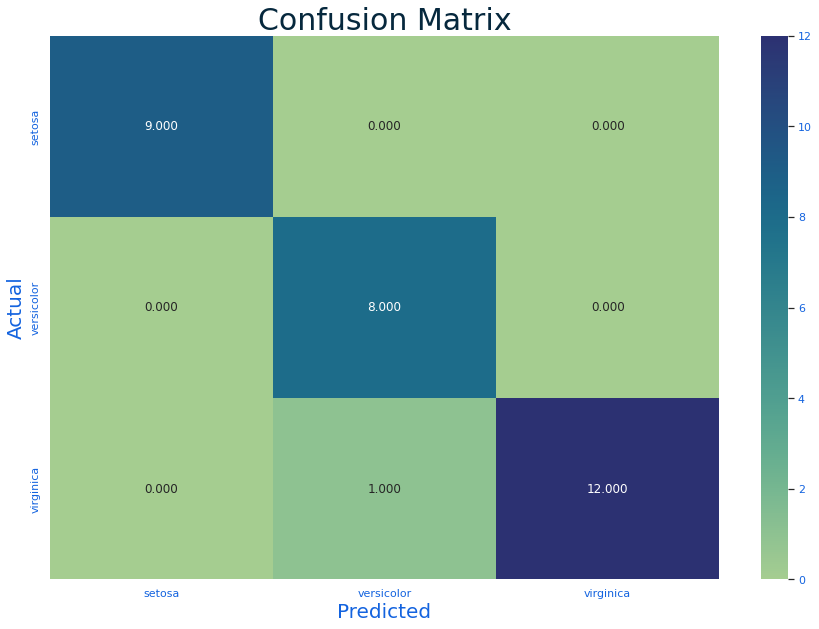

In [43]:
printCM(KNN, target_names=df0.target_names, x_test=x_test, y_test=y_test)

**Inference:**
- One virginica datapoint was misclassified as versicolor.

### Decision Boundaries

We take petal-width and petal-length because the class-clusters are clearly distinct in it.

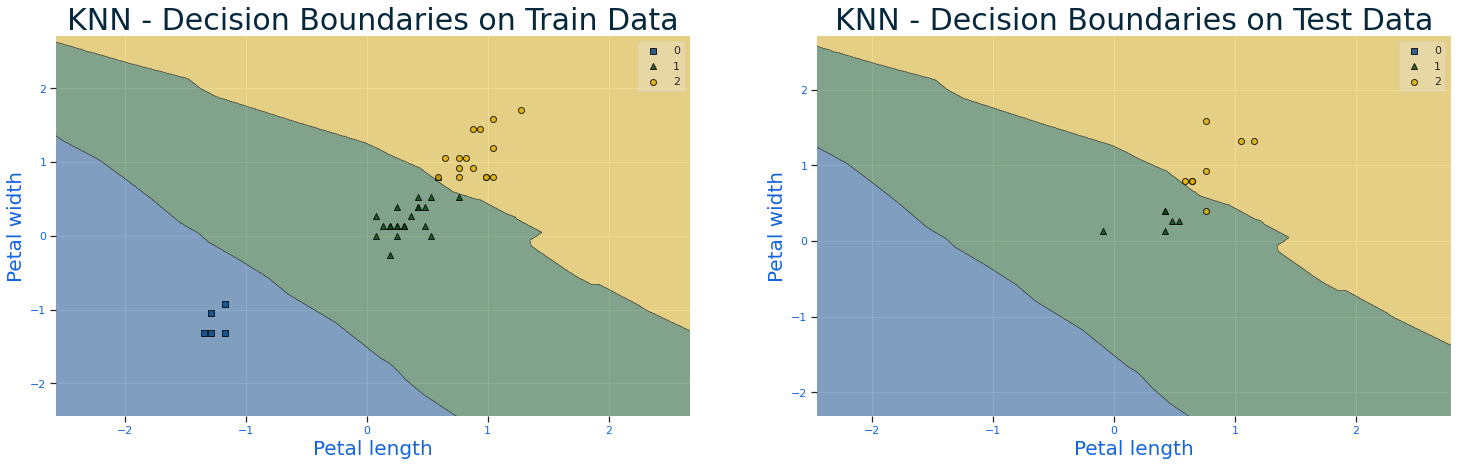

In [44]:
plt.figure(figsize=(25,7))
f1,f2 = 2,3
f3,f4 = 0,1
plt.subplot(1,2,1)
plot_decision_regions(X=x_train.values, y=y_train.values, clf=KNN,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("KNN - Decision Boundaries on Train Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.subplot(1,2,2)
plot_decision_regions(X=x_test.values, y=y_test.values, clf=KNN,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("KNN - Decision Boundaries on Test Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.show()

## SVM

### Creating the model

In [45]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train, y_train)

SVC()

### Predicting

In [46]:
y_pred = SVM.predict(x_test)
y_pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

### Performance Measurement

In [47]:
printScores(SVM, y_test, y_pred)

Score on test data: 96.6667 %
Precision score: 96.2963 %
Recall score: 97.4359 %
F1 score: 96.7059 %


### Confusion Matrix

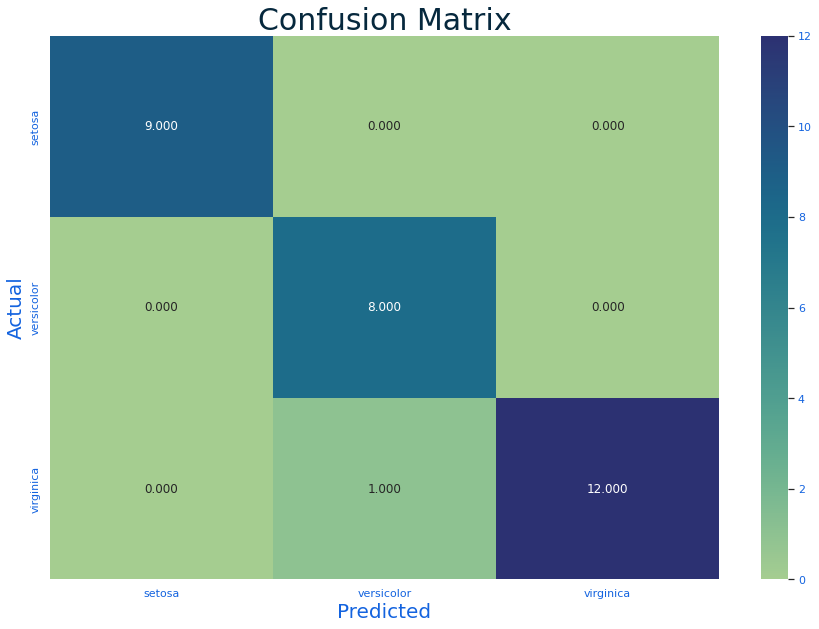

In [48]:
printCM(SVM,  target_names=df0.target_names, x_test=x_test, y_test=y_test)

**Inference:**
- One virginica datapoint was misclassified as versicolor.

### Decision Boundaries

We take petal-width and petal-length because the class-clusters are clearly distinct in it.

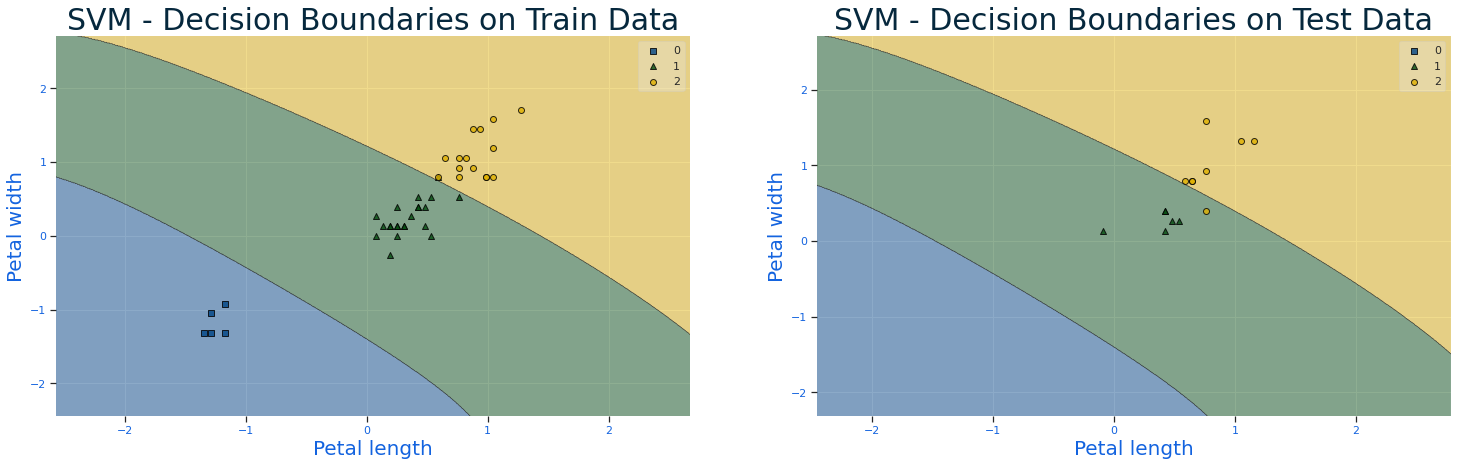

In [49]:
plt.figure(figsize=(25,7))
f1,f2 = 2,3
f3,f4 = 0,1
plt.subplot(1,2,1)
plot_decision_regions(X=x_train.values, y=y_train.values, clf=SVM,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("SVM - Decision Boundaries on Train Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.subplot(1,2,2)
plot_decision_regions(X=x_test.values, y=y_test.values, clf=SVM,\
                      feature_index=(f1,f2), filler_feature_values={f3:0,f4:0}, filler_feature_ranges={f3: 1, f4:1},\
                      colors='#004485,#044d0f,#dfb000')
plt.title("SVM - Decision Boundaries on Test Data", size=30, color='#06283D')
plt.xlabel("Petal length",  size=20, color='#1363DF')
plt.ylabel("Petal width",  size=20, color='#1363DF')

plt.show()